In [1]:
# Cargar paquetes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math as mt

In [2]:
# Asignar el directorio de trabajo, donde se encuentran los datos
import os
os.chdir("C:\\Users\\oskka\\OneDrive\\Documentos\\José\\CONAPO")

In [13]:
# Nacimientos 2022, desde Estadísticas Vitales de INEGI
#Descarga de datos y crear repositorio en directorio de trabajo
#Fuente: https://www.inegi.org.mx/contenidos/programas/natalidad/datosabiertos/2022/conjunto_de_datos_natalidad_2022_csv.zip
#nacimientos = pd.read_csv('NACIMIENTOS_2022\\conjunto_de_datos\\conjunto_de_datos_natalidad_2022.csv')
nacimientos = pd.read_csv('natalidad_base_datos_2000_dbf\\NACIM00.csv')

In [16]:
print(nacimientos.iloc[1:6, 11:20])

   loc_ocurr  tloc_ocurr  sexo  edad_reg  edad_madn  edad_padn  dia_nac  \
1        NaN         NaN     2        98         22         25        4   
2        NaN         NaN     2        98         23         24       17   
3        NaN         NaN     1        98         29         44       17   
4        NaN         NaN     1        98         28         26        1   
5        NaN         NaN     1        98         32         27       25   

   mes_nac  ano_nac  
1       12     1999  
2       12     1999  
3       10     1999  
4       12     1999  
5        9     1999  


In [17]:
# Selección de nacimientos femeninos por edad de la madre
nacim = nacimientos[(nacimientos['sexo']==2) & (nacimientos['edad_madn']<99)]
nacim = nacim[['edad_madn']]
# Agrupar por intervalos de edad de la madre
nacim['Grupos_Edad'] = pd.cut(x = nacim['edad_madn'], bins=[15, 20, 25, 30, 35, 40, 45, 50], right=False)
nacim2= nacim.groupby(['Grupos_Edad'], as_index=False).count()
print(nacim2)

  Grupos_Edad  edad_madn
0    [15, 20)     213360
1    [20, 25)     392773
2    [25, 30)     338444
3    [30, 35)     207157
4    [35, 40)      97850
5    [40, 45)      28318
6    [45, 50)       4293


C:\Users\oskka\AppData\Local\Temp\ipykernel_13840\892633022.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  nacim2= nacim.groupby(['Grupos_Edad'], as_index=False).count()


In [18]:
#Poblaciones estables: método de Lotka, con base en población femenina y nacimiento de mujeres
# Preston, Heuveline & Guillot (2000, Cap. 7)
df = pd.read_csv('bin\\tabla_de_mortalidad_2000.csv')
#Seleccionamos población femenina y columnas de Tabla de Vida
femen = df.iloc[23:42, 2:15]
femen = femen.reset_index()
femen = femen[['Grupos_Edad', 'x', 'n', 'POBLACION', 'lx', 'apvLx', 'Tx', 'evx']]
femen['apvLx'] = femen['apvLx']/1000000
femen['Tx'] = femen['Tx']/1000000


print(femen)

   Grupos_Edad   x  n  POBLACION       lx     apvLx         Tx   evx
0       [0, 1)   0  1    1181957  1000000  0.982600  76.364966  76.4
1       [1, 5)   1  4    4642636   980490  3.913557  75.382366  76.9
2      [5, 10)   5  5    5807672   977101  4.882109  71.468809  73.1
3     [10, 15)  10  5    5497051   975743  4.875132  66.586700  68.2
4     [15, 20)  15  5    5100086   974310  4.866209  61.711568  63.3
5     [20, 25)  20  5    4704422   972174  4.854150  56.845359  58.5
6     [25, 30)  25  5    4356133   969486  4.839296  51.991209  53.6
7     [30, 35)  30  5    3774011   966232  4.820533  47.151913  48.8
8     [35, 40)  35  5    3225930   961981  4.794692  42.331380  44.0
9     [40, 45)  40  5    2638575   955896  4.756437  37.536688  39.3
10    [45, 50)  45  5    2086437   946679  4.697736  32.780251  34.6
11    [50, 55)  50  5    1745196   932415  4.607159  28.082514  30.1
12    [55, 60)  55  5    1458776   910448  4.467614  23.475356  25.8
13    [60, 65)  60  5    1178619  

In [19]:
def simplifica(tabla):
    for i in reversed(range(len(tabla))):
        if tabla['x'].iloc[i] == 0: 
            tabla['n'].iloc[i] = 5
            tabla['POBLACION'].iloc[i] = tabla['POBLACION'].iloc[i] + tabla['POBLACION'].iloc[i + 1] 
            tabla['apvLx'].iloc[i] = tabla['apvLx'].iloc[i] + tabla['apvLx'].iloc[i + 1]
            tabla = tabla.drop(1).reset_index(drop=True)
    return(tabla)


In [22]:
tabla_mortalidad = simplifica(femen)
print(tabla_mortalidad)

   Grupos_Edad   x  n  POBLACION       lx     apvLx         Tx   evx
0       [0, 1)   0  5    5824593  1000000  4.896157  76.364966  76.4
1      [5, 10)   5  5    5807672   977101  4.882109  71.468809  73.1
2     [10, 15)  10  5    5497051   975743  4.875132  66.586700  68.2
3     [15, 20)  15  5    5100086   974310  4.866209  61.711568  63.3
4     [20, 25)  20  5    4704422   972174  4.854150  56.845359  58.5
5     [25, 30)  25  5    4356133   969486  4.839296  51.991209  53.6
6     [30, 35)  30  5    3774011   966232  4.820533  47.151913  48.8
7     [35, 40)  35  5    3225930   961981  4.794692  42.331380  44.0
8     [40, 45)  40  5    2638575   955896  4.756437  37.536688  39.3
9     [45, 50)  45  5    2086437   946679  4.697736  32.780251  34.6
10    [50, 55)  50  5    1745196   932415  4.607159  28.082514  30.1
11    [55, 60)  55  5    1458776   910448  4.467614  23.475356  25.8
12    [60, 65)  60  5    1178619   876597  4.255075  19.007742  21.7
13    [65, 70)  65  5     942101  

C:\Users\oskka\AppData\Local\Temp\ipykernel_13840\1984292036.py:4: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  tabla['n'].iloc[i] = 5
C:\Users\oskka\AppData\Local\Temp\ipykernel_13840\1984292036.py:4: SettingWithCopyWarning: 
A value is tr

In [23]:
# Población femenina en edad fértil
femenf = (tabla_mortalidad[tabla_mortalidad['x'].between(15, 45)].reset_index(drop=True))
print(femenf)
print(nacim2)

  Grupos_Edad   x  n  POBLACION      lx     apvLx         Tx   evx
0    [15, 20)  15  5    5100086  974310  4.866209  61.711568  63.3
1    [20, 25)  20  5    4704422  972174  4.854150  56.845359  58.5
2    [25, 30)  25  5    4356133  969486  4.839296  51.991209  53.6
3    [30, 35)  30  5    3774011  966232  4.820533  47.151913  48.8
4    [35, 40)  35  5    3225930  961981  4.794692  42.331380  44.0
5    [40, 45)  40  5    2638575  955896  4.756437  37.536688  39.3
6    [45, 50)  45  5    2086437  946679  4.697736  32.780251  34.6
  Grupos_Edad  edad_madn
0    [15, 20)     213360
1    [20, 25)     392773
2    [25, 30)     338444
3    [30, 35)     207157
4    [35, 40)      97850
5    [40, 45)      28318
6    [45, 50)       4293


In [49]:
type(femenf['Grupos_Edad'])

pandas.core.series.Series

In [24]:
# Se fusionan las tablas de mortalidad y de nacimientos femeninos
estable = pd.concat([femenf, nacim2], axis=1)

# Tasa Específica de Fecundidad Femenina
estable['5ma'] = (estable['edad_madn'] / estable['POBLACION'])
# TEFF por APV en cada grupo de edad (considerando la mortalidad)
estable['tnr'] = (estable['5ma'] * estable['apvLx'])
# La suma corresponde a la Tasa Neta de Reproducción
print(estable)

  Grupos_Edad   x  n  POBLACION      lx     apvLx         Tx   evx  \
0    [15, 20)  15  5    5100086  974310  4.866209  61.711568  63.3   
1    [20, 25)  20  5    4704422  972174  4.854150  56.845359  58.5   
2    [25, 30)  25  5    4356133  969486  4.839296  51.991209  53.6   
3    [30, 35)  30  5    3774011  966232  4.820533  47.151913  48.8   
4    [35, 40)  35  5    3225930  961981  4.794692  42.331380  44.0   
5    [40, 45)  40  5    2638575  955896  4.756437  37.536688  39.3   
6    [45, 50)  45  5    2086437  946679  4.697736  32.780251  34.6   

  Grupos_Edad  edad_madn       5ma       tnr  
0    [15, 20)     213360  0.041835  0.203576  
1    [20, 25)     392773  0.083490  0.405274  
2    [25, 30)     338444  0.077694  0.375983  
3    [30, 35)     207157  0.054890  0.264601  
4    [35, 40)      97850  0.030332  0.145434  
5    [40, 45)      28318  0.010732  0.051048  
6    [45, 50)       4293  0.002058  0.009666  


In [25]:
# TASA NETA DE REPRODUCCIÓN FEMENINA
tnr = round(estable['tnr'].sum(), 3)
print(tnr)
r0 = round(mt.log(tnr) / 27, 5)
print(r0)

1.456
0.01391


In [26]:
estable['r0']=0
estable['r1']=0
estable['r2']=0
estable['r3']=0
print(estable)

  Grupos_Edad   x  n  POBLACION      lx     apvLx         Tx   evx  \
0    [15, 20)  15  5    5100086  974310  4.866209  61.711568  63.3   
1    [20, 25)  20  5    4704422  972174  4.854150  56.845359  58.5   
2    [25, 30)  25  5    4356133  969486  4.839296  51.991209  53.6   
3    [30, 35)  30  5    3774011  966232  4.820533  47.151913  48.8   
4    [35, 40)  35  5    3225930  961981  4.794692  42.331380  44.0   
5    [40, 45)  40  5    2638575  955896  4.756437  37.536688  39.3   
6    [45, 50)  45  5    2086437  946679  4.697736  32.780251  34.6   

  Grupos_Edad  edad_madn       5ma       tnr  r0  r1  r2  r3  
0    [15, 20)     213360  0.041835  0.203576   0   0   0   0  
1    [20, 25)     392773  0.083490  0.405274   0   0   0   0  
2    [25, 30)     338444  0.077694  0.375983   0   0   0   0  
3    [30, 35)     207157  0.054890  0.264601   0   0   0   0  
4    [35, 40)      97850  0.030332  0.145434   0   0   0   0  
5    [40, 45)      28318  0.010732  0.051048   0   0   0   0 

In [27]:
# Identificación de la Tasa de Crecimiento Intrínseca a través de iteraciones
# Fuente: Preston, Heuveline & Guillot (2001, p: 149)
def busca_r(tabla):
    # Tasa de crecimiento inicial a partir de TNRF
    r = round(mt.log((tabla['tnr'].sum())) / 27, 5)
    # Iteraciones
    for j in range(12, 16):
        for i in range(len(tabla)):
            tabla.iloc[i,j] = (mt.exp( (-r) * (tabla['x'].iloc[i] + 2.5) ) * tabla['tnr'].iloc[i])
        yr = round(tabla.iloc[:,j].sum(), 5)
        r +=  round((yr - 1) / 27, 5 )
        
    print(tabla)
    print(yr)
    print(r)
    return r

In [28]:
r_intrinseca = busca_r(estable)

  Grupos_Edad   x  n  POBLACION      lx     apvLx         Tx   evx  \
0    [15, 20)  15  5    5100086  974310  4.866209  61.711568  63.3   
1    [20, 25)  20  5    4704422  972174  4.854150  56.845359  58.5   
2    [25, 30)  25  5    4356133  969486  4.839296  51.991209  53.6   
3    [30, 35)  30  5    3774011  966232  4.820533  47.151913  48.8   
4    [35, 40)  35  5    3225930  961981  4.794692  42.331380  44.0   
5    [40, 45)  40  5    2638575  955896  4.756437  37.536688  39.3   
6    [45, 50)  45  5    2086437  946679  4.697736  32.780251  34.6   

  Grupos_Edad  edad_madn       5ma       tnr        r0        r1        r2  \
0    [15, 20)     213360  0.041835  0.203576  0.159619  0.159563  0.159563   
1    [20, 25)     392773  0.083490  0.405274  0.296431  0.296297  0.296297   
2    [25, 30)     338444  0.077694  0.375983  0.256542  0.256401  0.256401   
3    [30, 35)     207157  0.054890  0.264601  0.168422  0.168313  0.168313   
4    [35, 40)      97850  0.030332  0.145434  0.0

C:\Users\oskka\AppData\Local\Temp\ipykernel_13840\2823725448.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.15961882528429833' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabla.iloc[i,j] = (mt.exp( (-r) * (tabla['x'].iloc[i] + 2.5) ) * tabla['tnr'].iloc[i])
C:\Users\oskka\AppData\Local\Temp\ipykernel_13840\2823725448.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.15956296847096135' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tabla.iloc[i,j] = (mt.exp( (-r) * (tabla['x'].iloc[i] + 2.5) ) * tabla['tnr'].iloc[i])
C:\Users\oskka\AppData\Local\Temp\ipykernel_13840\2823725448.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.1595629684709613

In [29]:
# Obtención de la población estable
# Con base en la tasa de crecimiento intrínseca
# Fuente: Preston, Heuveline & Guillot (2001, p: 150)

# Radix: 1
#femen['lx'] = femen['lx'] / 1000000

# c_actual: Estructura de población femenina actual
def stable(femen):
    femen['c_actual'] = femen['POBLACION'] / femen['POBLACION'].sum()
    # sobrevivencia por cohorte
    femen['b_inv'] = ""
    femen['ca_estable'] = ""
    
    for i in range(len(femen)):
        if femen['x'].iloc[i] == 85:
            femen['b_inv'].iloc[i] = (mt.exp((-r_intrinseca) * (femen['x'].iloc[i] + femen['evx'].iloc[i])) * (femen['Tx'].iloc[i]))
        else:
            femen['b_inv'].iloc[i] = (mt.exp((-r_intrinseca) * (femen['x'].iloc[i] + 2.5)) * (femen['apvLx'].iloc[i]))
    
    b_intr = round(1 / femen['b_inv'].sum(), 5)
    d_intr = r_intrinseca - b_intr

    # Estructura de Población estable
    for i in range(len(femen)):
        femen['ca_estable'].iloc[i] = b_intr * mt.exp((-r_intrinseca) * (femen['x'].iloc[i] + 2.5)) * (femen['apvLx'].iloc[i])
    
    print ("r: " + str(r_intrinseca)) 
    print("b: " + str(b_intr))
    print("d: " + str(d_intr))
    print("suma de ca_estable: " + str(round(femen['ca_estable'].sum(), 5)))
       
    return(femen)

In [30]:
pop_estable = stable(tabla_mortalidad)

r: 0.013919999999999998
b: 0.02175
d: -0.00783
suma de ca_estable: 0.99477


C:\Users\oskka\AppData\Local\Temp\ipykernel_13840\533711401.py:19: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  femen['b_inv'].iloc[i] = (mt.exp((-r_intrinseca) * (femen['x'].iloc[i] + 2.5)) * (femen['apvLx'].iloc[i]))
C:\Users\oskka\AppDat

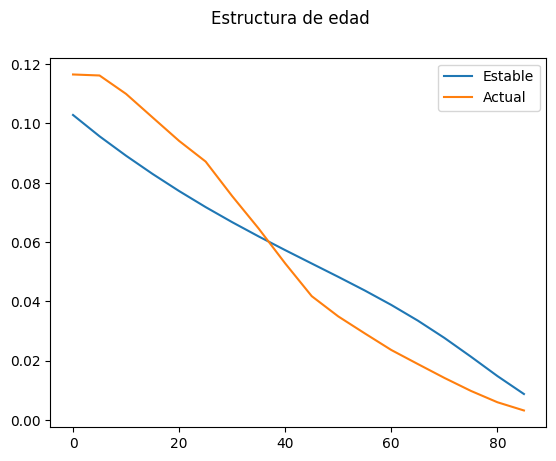

In [31]:

x = pop_estable.x
y1 = pop_estable.ca_estable
y2 = pop_estable.c_actual

fig, axs = plt.subplots()
fig.suptitle('Estructura de edad')
axs.plot(x, y1, label='Estable')
axs.plot(x, y2, label='Actual')

#Legend
axs.legend()

plt.show()